In [2]:
import yfinance as yf
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import numpy as np

In [25]:
num_periods_fast = 10 # fast EMA time period
K_fast = 2 / (num_periods_fast + 1) # fast EMA smoothing factor
ema_fast = 0
num_periods_slow = 40 # slow EMA time period
K_slow = 2 / (num_periods_slow + 1) # slow EMA smoothing factor
ema_slow = 0
num_periods_macd = 20 # MACD EMA time period
K_macd = 2 / (num_periods_macd + 1) # MACD EMA smoothing factor
ema_macd = 0
ema_fast_values = [] # track fast EMA values for visualization purposes
ema_slow_values = [] # track slow EMA values for visualization purposes
macd_values = [] # track MACD values for visualization purposes
macd_signal_values = [] # MACD EMA values tracker
macd_histogram_values = [] # MACD - MACD-EMA

In [26]:
sbi =  yf.Ticker(str('SBIN')+'.NS').history(period="40d")

In [27]:
for close_price in sbi['Close']:
    if (ema_fast == 0): # first observation
        ema_fast = close_price
        ema_slow = close_price
    else:
        ema_fast = (close_price - ema_fast) * K_fast + ema_fast
        ema_slow = (close_price - ema_slow) * K_slow + ema_slow
    ema_fast_values.append(ema_fast)
    ema_slow_values.append(ema_slow)
    macd = ema_fast - ema_slow # MACD is fast_MA - slow_EMA
    if ema_macd == 0:
        ema_macd = macd
    else:
        ema_macd = (macd - ema_macd) * K_slow + ema_macd # signal is EMA of MACD values
    macd_values.append(macd)
    macd_signal_values.append(ema_macd)
    macd_histogram_values.append(macd - ema_macd)

In [28]:
len(macd_histogram_values)

40

In [30]:
sbi['FastExponential10DayMovingAverage'] = pd.Series(ema_fast_values, index = sbi.index)
sbi['SlowExponential40DayMovingAverage'] = pd.Series(ema_slow_values, index = sbi.index)
sbi['MovingAverageConvergenceDivergence'] = pd.Series(macd_values, index = sbi.index)
sbi['Exponential20DayMovingAverageOfMACD'] = pd.Series(macd_signal_values, index = sbi.index)
sbi['MACDHistorgram'] = pd.Series(macd_histogram_values, index = sbi.index)


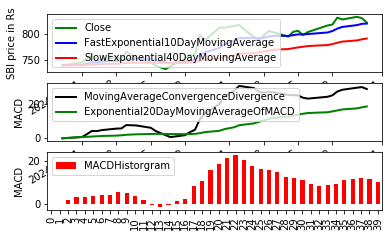

In [33]:
fig = plt.figure()
ax1 = fig.add_subplot(311, ylabel='SBI price in Rs')
sbi['Close'].plot(ax=ax1, color='g', lw=2., legend=True)
sbi['FastExponential10DayMovingAverage'] .plot(ax=ax1, color='b', lw=2., legend=True)
sbi['SlowExponential40DayMovingAverage'].plot(ax=ax1, color='r', lw=2., legend=True)
ax2 = fig.add_subplot(312, ylabel='MACD')
sbi['MovingAverageConvergenceDivergence'].plot(ax=ax2, color='black', lw=2., legend=True)
sbi['Exponential20DayMovingAverageOfMACD'].plot(ax=ax2, color='g', lw=2., legend=True)
ax3 = fig.add_subplot(313, ylabel='MACD')
sbi['MACDHistorgram'] .plot(ax=ax3, color='r', kind='bar', legend=True,
use_index=False)
plt.show()

The MACD signal is very similar to the APO, as we expected, but now, in addition, the EMA (MACD)
is an additional smoothing factor on top of raw MACD values to capture lasting
trending periods by smoothing out the noise of raw values. Finally, the MACD HISTOGRAM
which is the difference in the two series, captures (a) the time period when MACD HISTOGRAM the trend is
starting or reversion, and (b) the magnitude of lasting trends when values
stay positive or negative after reversing signs.